In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rc('text', usetex=True); plt.rc('font', family='serif')

In [2]:
df_importance = pd.read_csv("../data/model/importance.csv", index_col=0)

# Feature Importance

### General

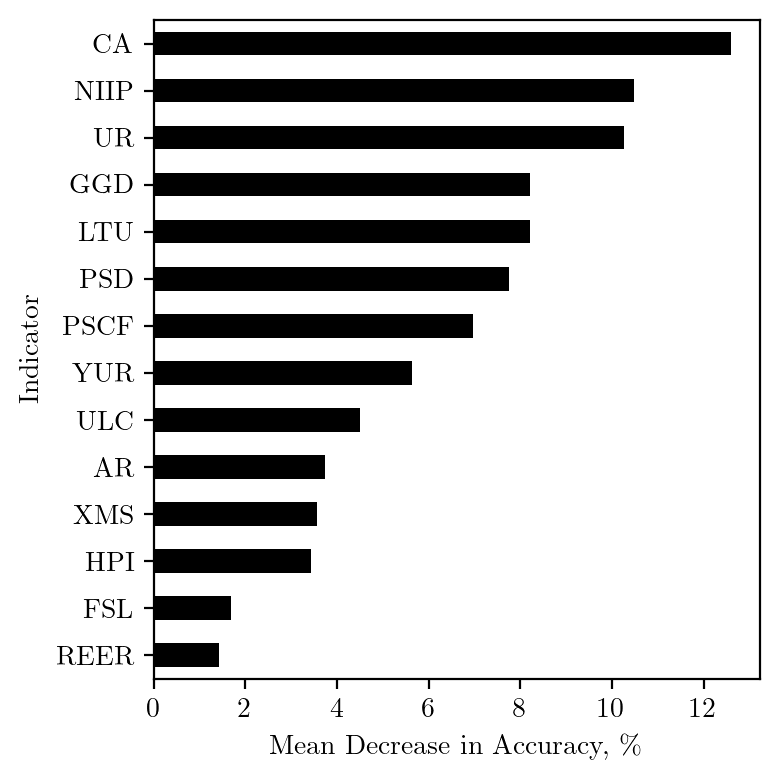

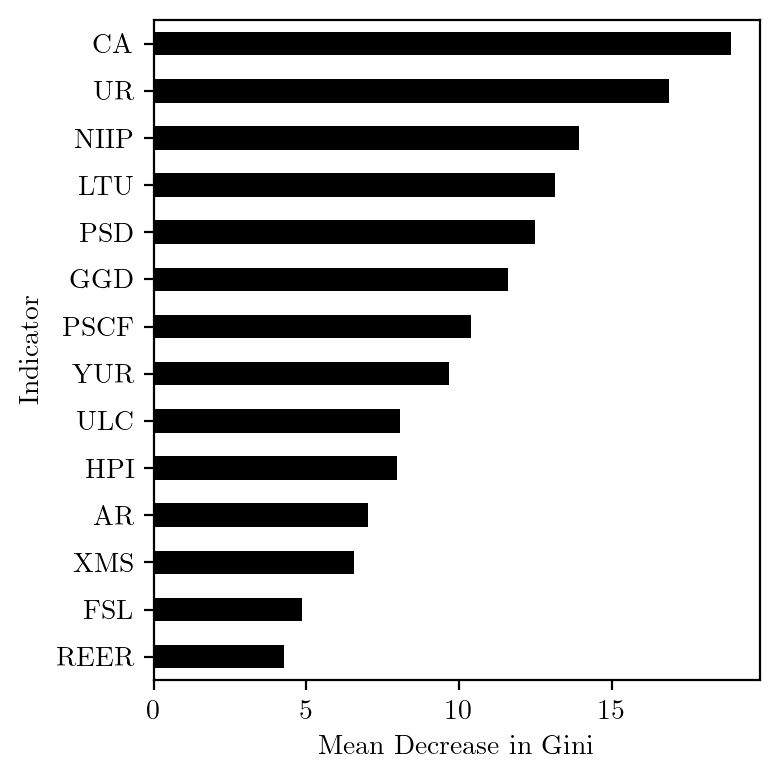

In [9]:
for i,x in enumerate(['Mean Decrease in Accuracy, \%', 'Mean Decrease in Gini']):
    f,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=200); f.patch.set_facecolor('white')
    series_i = (df_importance.iloc[:,4+i].sort_values()*[100,1][i])
    series_i.plot.barh(ax=ax,color='k')
    #[ax.text(v-0.7, j, str(round(v,1)), ha='center',va='center', color='w', fontsize=8) for j, v in enumerate(series_i)]
    ax.set_ylabel("Indicator"); ax.set_xlabel(x)
    plt.tight_layout()
    series_i.to_csv('../data/latex/featureImportance_{}.csv'.format(["acc",'gini'][i]),header=["acc",'gini'][i])
    plt.savefig('../data/latex/featureImportance_{}.pdf'.format(["acc",'gini'][i]), dpi=200, bbox_inches='tight')
    plt.show()

### Per category

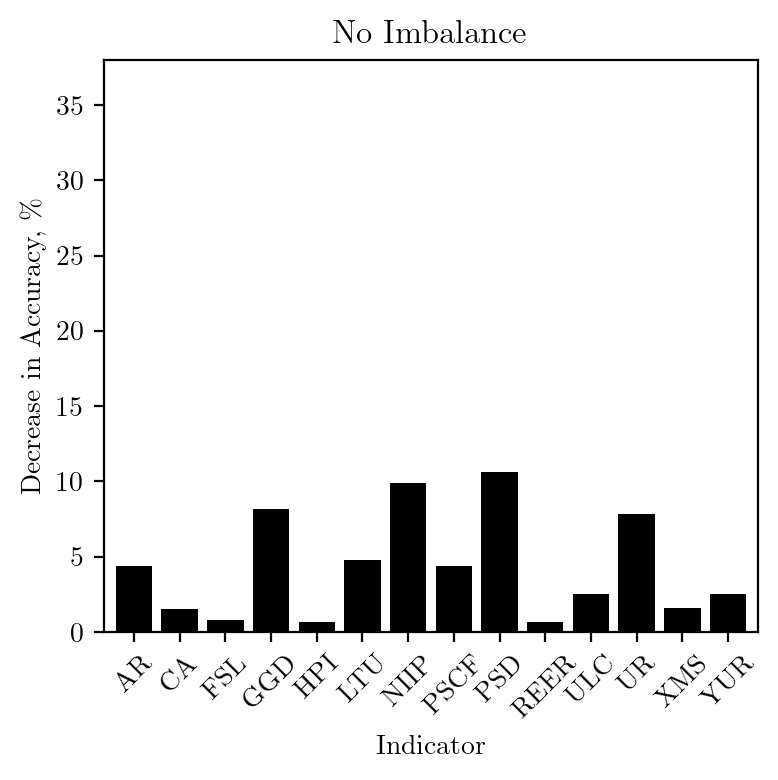

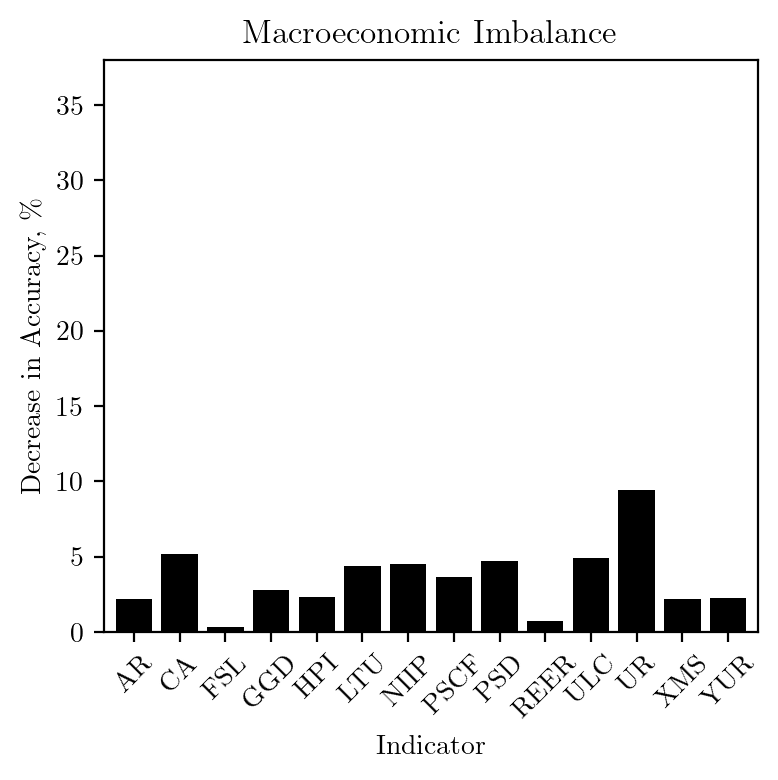

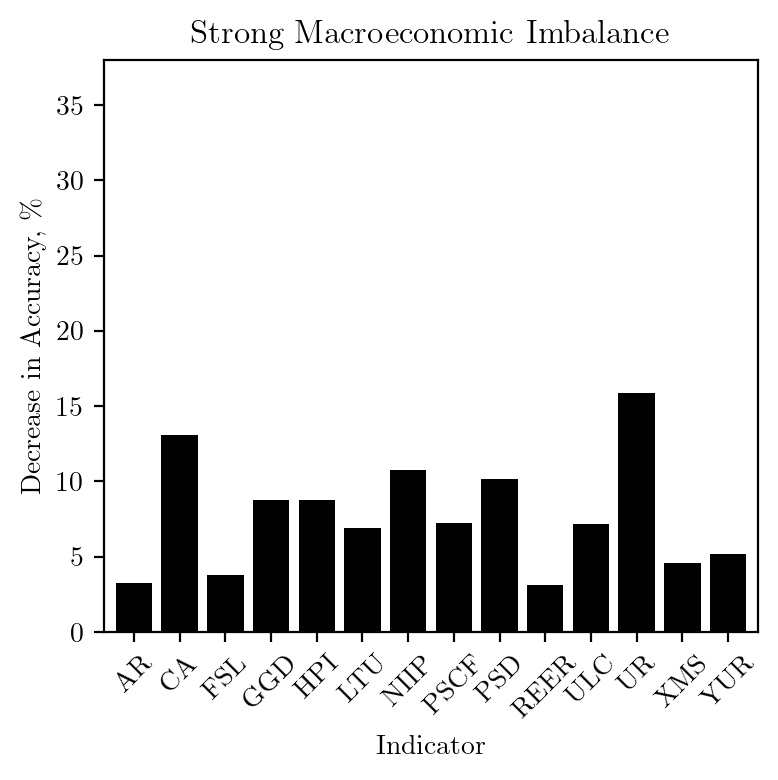

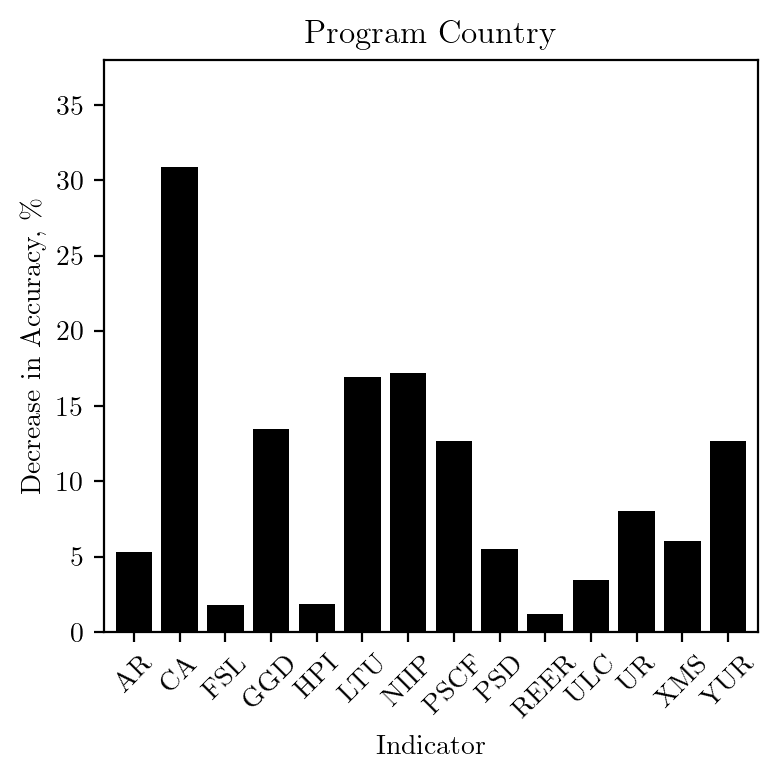

In [5]:
for i,x in enumerate(["No Imbalance", "Macroeconomic Imbalance", "Strong Macroeconomic Imbalance", "Program Country"]):
    f,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=200); f.patch.set_facecolor('white')
    series_i = (df_importance.sort_index()*100).iloc[:,i]
    series_i.plot.bar(width=0.8,ax=ax,color='k')
    #[ax.text(j, v+0.5, str(round(v,1)), ha='center',va='center', color='k', fontsize=8) for j, v in enumerate(series_i)]
    ax.set_title(x); ax.set_ylabel('Decrease in Accuracy, \%'); ax.set_xlabel("Indicator"); ax.tick_params(axis='x', rotation=45)
    ax.set_ylim([0,38])
    plt.tight_layout()
    series_i.to_csv('../data/latex/featureImportance_{}.csv'.format(i+1),header=str(i+1))
    plt.savefig('../data/latex/featureImportance_{}.pdf'.format(i+1), dpi=200, bbox_inches='tight')
    plt.show()

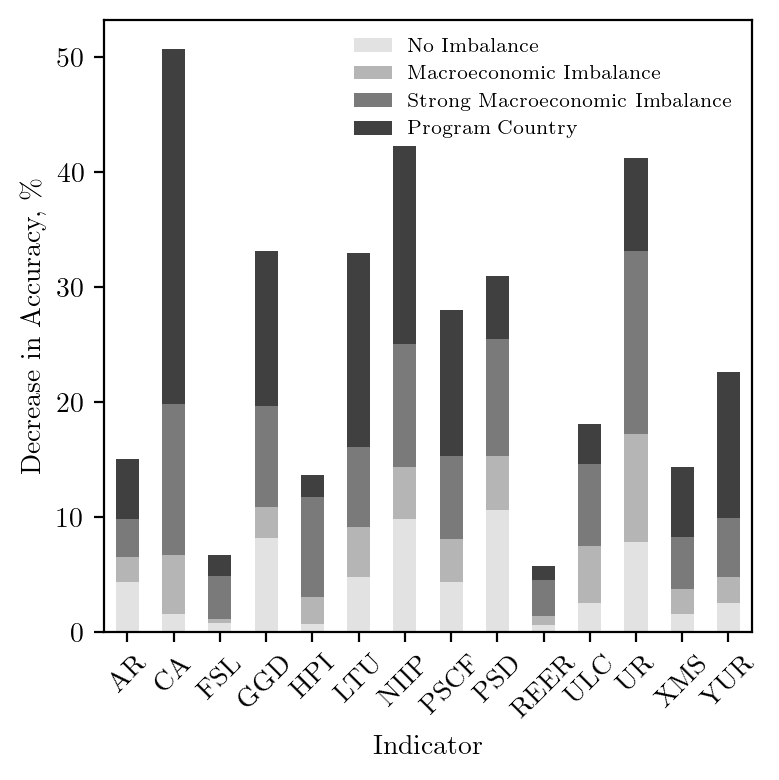

In [7]:
f,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=200); f.patch.set_facecolor('white')
(df_importance.iloc[:,:4]*100).sort_index().plot.bar(stacked=True, ax=ax, color=sns.color_palette("Greys", 4))
ax.legend(["No Imbalance", "Macroeconomic Imbalance", "Strong Macroeconomic Imbalance", "Program Country"],fontsize=7, frameon=False)
ax.set_xlabel("Indicator"); ax.set_ylabel('Decrease in Accuracy, \%'); ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../data/latex/featureImportance_stacked.pdf', dpi=200, bbox_inches='tight')
plt.show()

<br>